# Metrics and Regression Evaluation

In [1]:
from sklearn.utils import Bunch
import requests
import pandas as pd
import numpy as np

def load_boston(*, return_X_y=False):
    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    columns = pd.read_csv(data_url, sep="\s+", skiprows=7, nrows=14, usecols=[0], header=None)
    resp = requests.get(data_url)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]
    feature_names = columns[0].values[:-1]
    DESCR = resp.text[:resp.text.find("$1000's")+7]
    if return_X_y:
        return data, target
    return Bunch(data=data, target=target, feature_names=feature_names, DESCR=DESCR)

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
# from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn import (
    model_selection,
    preprocessing,
)
b = load_boston()
bos_X = pd.DataFrame(
    b.data, columns=b.feature_names
)
bos_y = b.target
bos_X_train, bos_X_test, bos_y_train, bos_y_test = model_selection.train_test_split(
    bos_X,
    bos_y,
    test_size=0.3,
    random_state=42,
)
bos_sX = preprocessing.StandardScaler().fit_transform(
    bos_X
)
bos_sX_train, bos_sX_test, bos_sy_train, bos_sy_test = model_selection.train_test_split(
    bos_sX,
    bos_y,
    test_size=0.3,
    random_state=42,
)

In [3]:
rfr = RandomForestRegressor(
    random_state=42, n_estimators=100
)
rfr.fit(bos_X_train, bos_y_train)

RandomForestRegressor(random_state=42)

In [4]:
from sklearn import metrics
rfr.score(bos_X_test, bos_y_test)
bos_y_test_pred = rfr.predict(bos_X_test)
metrics.r2_score(bos_y_test, bos_y_test_pred)

0.8708997131330258

In [5]:
metrics.explained_variance_score(
    bos_y_test, bos_y_test_pred
)

0.87128003640625

In [6]:
metrics.mean_absolute_error(
    bos_y_test, bos_y_test_pred
)

2.083605263157894

In [7]:
metrics.mean_squared_error(
    bos_y_test, bos_y_test_pred
)

9.619662013157892

In [8]:
metrics.mean_squared_log_error(
    bos_y_test, bos_y_test_pred
)

0.02128735507001922

/home/nglazov@pak-cspmz.ru/.virtualenvs/r-tensorflow/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


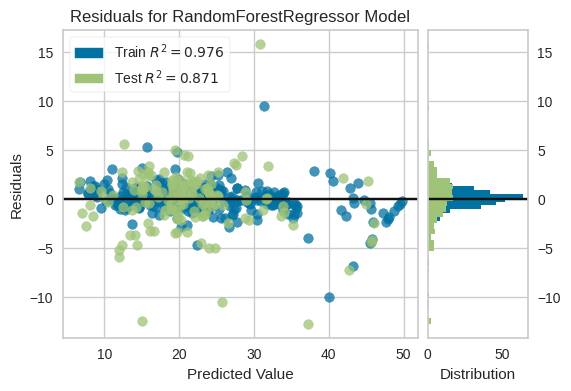

In [9]:
from yellowbrick.regressor import ResidualsPlot
fig, ax = plt.subplots(figsize=(6, 4))
rpv = ResidualsPlot(rfr)
rpv.fit(bos_X_train, bos_y_train)
rpv.score(bos_X_test, bos_y_test)
rpv.poof();
#fig.savefig("images/mlpr_1501.png", dpi=300)

In [10]:
# import statsmodels.stats.api as sms
# resids = bos_y_test - rfr.predict(bos_X_test)
# hb = sms.het_breuschpagan(resids, bos_X_test)
# labels = [
#     "Lagrange multiplier statistic",
#     "p-value",
#     "f-value",
#     "f p-value",
# ]
# for name, num in zip(labels, hb):
#     print(f"{name}: {num:.2}")

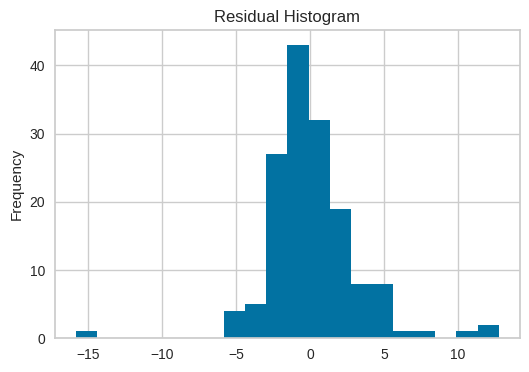

In [11]:
fig, ax = plt.subplots(figsize=(6, 4))
resids = bos_y_test - rfr.predict(bos_X_test)
pd.Series(resids, name="residuals").plot.hist(
    bins=20, ax=ax, title="Residual Histogram"
);
#fig.savefig("images/mlpr_1502.png", dpi=300)

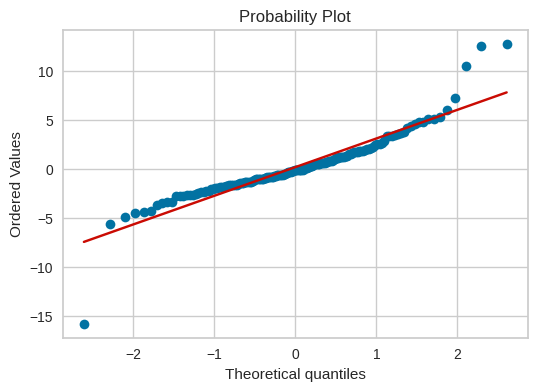

In [12]:
from scipy import stats
fig, ax = plt.subplots(figsize=(6, 4))
_ = stats.probplot(resids, plot=ax)
#fig.savefig("images/mlpr_1503.png", dpi=300)

In [13]:
stats.kstest(resids, cdf="norm")

KstestResult(statistic=0.2030324289045929, pvalue=5.705755737845543e-06, statistic_location=-1.3629999999999907, statistic_sign=1)

/home/nglazov@pak-cspmz.ru/.virtualenvs/r-tensorflow/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


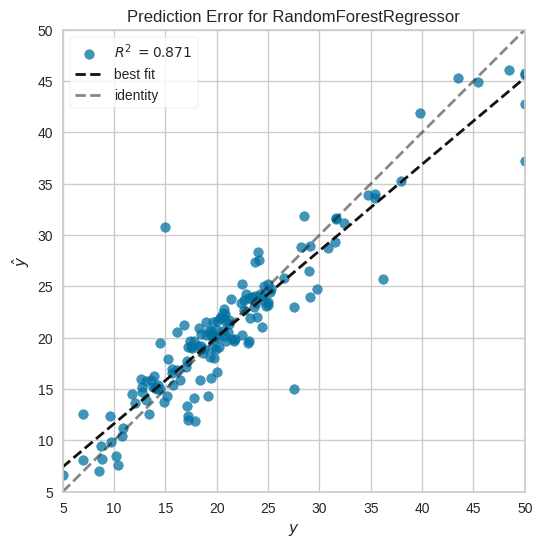

In [14]:
from yellowbrick.regressor import (
    PredictionError,
)
fig, ax = plt.subplots(figsize=(6, 6))
pev = PredictionError(rfr)
pev.fit(bos_X_train, bos_y_train)
pev.score(bos_X_test, bos_y_test)
pev.poof();
#fig.savefig("images/mlpr_1504.png", dpi=300)

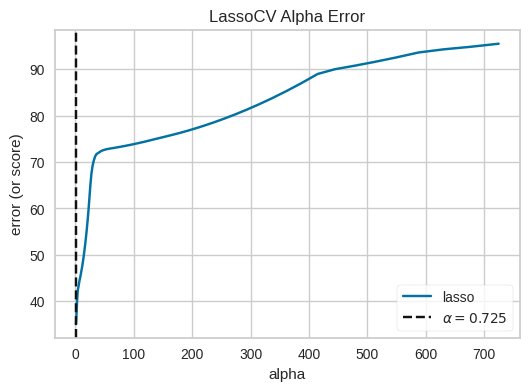

In [15]:
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import (
    AlphaSelection,
)
fig, ax = plt.subplots(figsize=(6, 4))
asv = AlphaSelection(LassoCV(cv=5))
asv.fit(bos_X, bos_y)
asv.poof();
#fig.savefig("images/asv.png", dpi=300)